# CREDIT CARD FRAUD DETECTION
Develop a fraud detection model to identify fraudulent credit card
transactions. Use techniques like anomaly detection or supervised
learning with imbalanced data.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Displaying few rows from dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Separate features and target variable
x = data.drop('Class', axis=1)
y = data['Class']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)

# Drop rows with NaN values in the target variable 'y'
x = x[~y.isnull()]
y = y.dropna()

x, y = smote.fit_resample(x, y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
# Train the model

# Initialize random forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [3]:
# Evaluate the model
y_predict = random_forest.predict(x_test)

print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

[[85133    16]
 [    0 85440]]


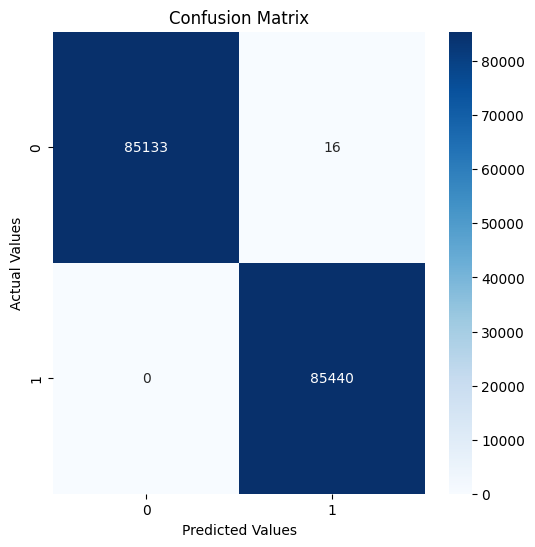

In [4]:
# Confusion Martrix
confusion_matrix = confusion_matrix(y_test, y_predict)
plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix, annot = True, fmt = 'd', cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()